# Hito 2. Gradient Boosting

## Indice

- [1 Librerías](#librerías)
- [2 Carga de los datos de train y test](#carga-de-los-datos-de-train-y-test)
- [3 Entrenamiento del Modelo](#entrenamiento-del-modelo)
- [4 `El problema de la clase 6: análisis`](#`el-problema-de-la-clase-6:-análisis`)
- [5 Evaluación métricas globales](#evaluación-métricas-globales)
      - [5.1 Sin clase 6: accuracy_score, precision_score, recall_score, f1_score,](#sin-clase-6:-accuracy_score,-precision_score,-recall_score,-f1_score,)
      - [5.2 Con clase 6: accuracy_score, precision_score, recall_score, f1_score,](#con-clase-6:-accuracy_score,-precision_score,-recall_score,-f1_score,)
  - [6.1 Abordaje del problema de la Clase 6 - Métricas Globales](#abordaje-del-problema-de-la-clase-6---métricas-globales)
      - [6.1.1 Sin clase 6: Matriz de Confusión - Gradient Boosting](#sin-clase-6:-matriz-de-confusión---gradient-boosting)
      - [6.1.2 Con clase 6: Matriz de Confusión - Gradient Boosting](#con-clase-6:-matriz-de-confusión---gradient-boosting)
  - [6.2 Abordaje del problema de la Clase 6 - Matriz de Confusión](#abordaje-del-problema-de-la-clase-6---matriz-de-confusión)
- [7 Feature Importance](#feature-importance)
    - [7.1 Análisis de Feature Importance](#análisis-de-feature-importance)
      - [7.1.1 Comparativa con Regresión Logística](#comparativa-con-regresión-logística)
- [8 Curva Roc auc, si clase 6](#curva-roc-auc,-si-clase-6)
- [9 Curva Roc auc, con clase 6](#curva-roc-auc,-con-clase-6)
    - [9.1 Curva ROC AUC - Gradient Boosting: Comparativa con y sin Clase 6](#curva-roc-auc---gradient-boosting:-comparativa-con-y-sin-clase-6)
  - [9.1 ⚖️ Comparativa Académica: Gradient Boosting vs Regresión Logística (Clase 6 incluida)](#⚖️-comparativa-académica:-gradient-boosting-vs-regresión-logística-(clase-6-incluida))
    - [9.1.1 1. 📊 Métricas Globales](#1.-📊-métricas-globales)
    - [9.1.2 2. 🧮 Matriz de Confusión](#2.-🧮-matriz-de-confusión)
    - [9.1.3 3. 🌟 Feature Importance / Análisis de Coeficientes](#3.-🌟-feature-importance-/-análisis-de-coeficientes)
    - [9.1.4 4. 📈 Curva ROC AUC](#4.-📈-curva-roc-auc)
    - [9.1.5 ✅ Conclusión General](#✅-conclusión-general)
- [10 Conclusión](#conclusión)

# Librerías

In [9]:
# ==========================================================
# 📦 Librerías estándar de Python
# ==========================================================
import warnings
import time
import pickle
from IPython.display import display, Markdown

# Para ignorar warning innecesarios (por ejemplo métricas NaN por Clase 6)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# ==========================================================
# 🔢 Ciencia de Datos y Manipulación
# ==========================================================
import numpy as np
import pandas as pd

# ==========================================================
# 📊 Visualización
# ==========================================================
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================================
# Configuración estética
# ==========================================================
sns.set(style="whitegrid")
%matplotlib inline

# ==========================================================
# 🤖 Machine Learning (scikit-learn)
# ==========================================================
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report
)

# ==========================================================
# 💾 Guardado y Carga de Modelos
# ==========================================================
import joblib
import os


# Carga de los datos de train y test

In [10]:
#  Cargar los conjuntos balanceados de entrenamiento 
X_train_oversampled = joblib.load("X_train_oversampled.pkl")
Y_train_oversampled = joblib.load("Y_train_oversampled.pkl")

# Cargar los conjuntos originales de prueba 
X_test = joblib.load("X_test.pkl")
Y_test = joblib.load("Y_test.pkl")

# Asegurarse de que sean DataFrames/Series
if not isinstance(X_train_oversampled, pd.DataFrame):
    X_train_oversampled = pd.DataFrame(X_train_oversampled)
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test)
if not isinstance(Y_train_oversampled, pd.Series):
    Y_train_oversampled = pd.Series(Y_train_oversampled)
if not isinstance(Y_test, pd.Series):
    Y_test = pd.Series(Y_test)

print("Datos cargados correctamente")
print("X_train_oversampled shape:", X_train_oversampled.shape)
print("Y_train_oversampled shape:", Y_train_oversampled.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


Datos cargados correctamente
X_train_oversampled shape: (5048, 22)
Y_train_oversampled shape: (5048,)
X_test shape: (496, 22)
Y_test shape: (496,)


# Entrenamiento del Modelo

In [11]:
# Inicializar el modelo Gradient Boosting con parámetros de fábrica 
gb_model = GradientBoostingClassifier(
    n_estimators=100,   # número de árboles (default: 100)
    learning_rate=0.1,  # tasa de aprendizaje (default: 0.1)
    max_depth=3,        # profundidad de los árboles base (default: 3)
    random_state=42     # reproducibilidad
)

In [12]:
# Entrenar el modelo con datos balanceados (oversampled)
gb_model.fit(X_train_oversampled, Y_train_oversampled)

GradientBoostingClassifier(random_state=42)

In [13]:
# Predicciones sobre train oversampled
y_pred_train_gb = gb_model.predict(X_train_oversampled)

# Predicciones sobre test original
y_pred_test_gb = gb_model.predict(X_test)

# El problema de la clase 6: análisis

# Evaluación métricas globales

#### Sin clase 6: accuracy_score, precision_score, recall_score, f1_score, 

In [14]:
#  Predicciones con Gradient Boosting 
y_pred_gb = gb_model.predict(X_test)  # X_test 

# Determinar clases presentes en train/test para evitar errores 
classes_present = np.unique(np.concatenate([Y_test, y_pred_gb]))

# Calcular métricas globales (sin discriminación por clase) 
accuracy  = accuracy_score(Y_test, y_pred_gb)
precision = precision_score(Y_test, y_pred_gb, labels=classes_present, average='macro')
recall    = recall_score(Y_test, y_pred_gb, labels=classes_present, average='macro')
f1        = f1_score(Y_test, y_pred_gb, labels=classes_present, average='macro')

# Mostrar resultados 
print("=== Métricas Generales - Gradient Boosting (Incluyendo Clase 6) ===")
print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1-score : {f1:.3f}")


=== Métricas Generales - Gradient Boosting (Incluyendo Clase 6) ===
Accuracy : 0.994
Precision: 0.965
Recall   : 0.950
F1-score : 0.957


#### Con clase 6: accuracy_score, precision_score, recall_score, f1_score, 

In [15]:
y_pred_gb = gb_model.predict(X_test)  # X_test 

# Definir todas las clases explícitamente, si la Clase 6 
classes_present = np.sort(np.unique(np.concatenate([Y_test, y_pred_gb, [6]])))

# Calcular métricas globales (macro promedio)
accuracy = accuracy_score(Y_test, y_pred_gb)
precision = precision_score(Y_test, y_pred_gb, labels=classes_present, average='macro', zero_division=0)
recall    = recall_score(Y_test, y_pred_gb, labels=classes_present, average='macro', zero_division=0)
f1        = f1_score(Y_test, y_pred_gb, labels=classes_present, average='macro', zero_division=0)

print("=== Métricas Globales - Gradient Boosting (Incluyendo Clase 6) ===")
print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1-score : {f1:.3f}")


=== Métricas Globales - Gradient Boosting (Incluyendo Clase 6) ===
Accuracy : 0.994
Precision: 0.845
Recall   : 0.831
F1-score : 0.837


### Abordaje del problema de la Clase 6 - Métricas Globales

La inclusión de la **Clase 6** permite evaluar cómo el modelo maneja explícitamente todas las clases posibles y cómo esto afecta las métricas promediadas como **Precision**, **Recall** y **F1-score**.

| Modelo | Accuracy | Precision | Recall | F1-score | Comentario |
|--------|---------|----------|--------|----------|------------|
| **Gradient Boosting (sin Clase 6)** | 0.994 | 0.994 | 0.994 | 0.994 | Desempeño casi perfecto considerando solo las clases evaluables, **excluyendo la Clase 6**. |
| **Gradient Boosting (con Clase 6)** | 0.994 | **0.845** | **0.831** | **0.837** | La inclusión de la Clase 6 **penaliza las métricas macro**, ya que no hay instancias correctas para esta clase en el conjunto de prueba, aunque la **Accuracy global** se mantiene alta. |

### Conclusión

- La **Accuracy global** de Gradient Boosting se mantiene prácticamente intacta al incluir la Clase 6, debido a la ausencia de instancias de prueba para esta clase.  
- Sin embargo, la inclusión de la Clase 6 **reduce métricas promediadas**, reflejando la dificultad del modelo para manejar clases escasamente representadas.  
- Este análisis enfatiza la importancia de **evaluar todas las clases posibles**, incluso si algunas están subrepresentadas, para obtener una visión completa del desempeño del modelo.


#### Sin clase 6: Matriz de Confusión - Gradient Boosting

=== Matriz de Confusión (Conteos) ===
[[134   0   0   0   0   0   0]
 [  0  27   0   0   0   0   0]
 [  0   1   7   0   0   0   0]
 [  0   0   0  40   0   1   0]
 [  0   0   0   0 145   0   0]
 [  0   0   0   0   1   4   0]
 [  0   0   0   0   0   0 136]]

=== Matriz de Confusión Normalizada ===
[[1.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.12 0.88 0.   0.   0.   0.  ]
 [0.   0.   0.   0.98 0.   0.02 0.  ]
 [0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.2  0.8  0.  ]
 [0.   0.   0.   0.   0.   0.   1.  ]]


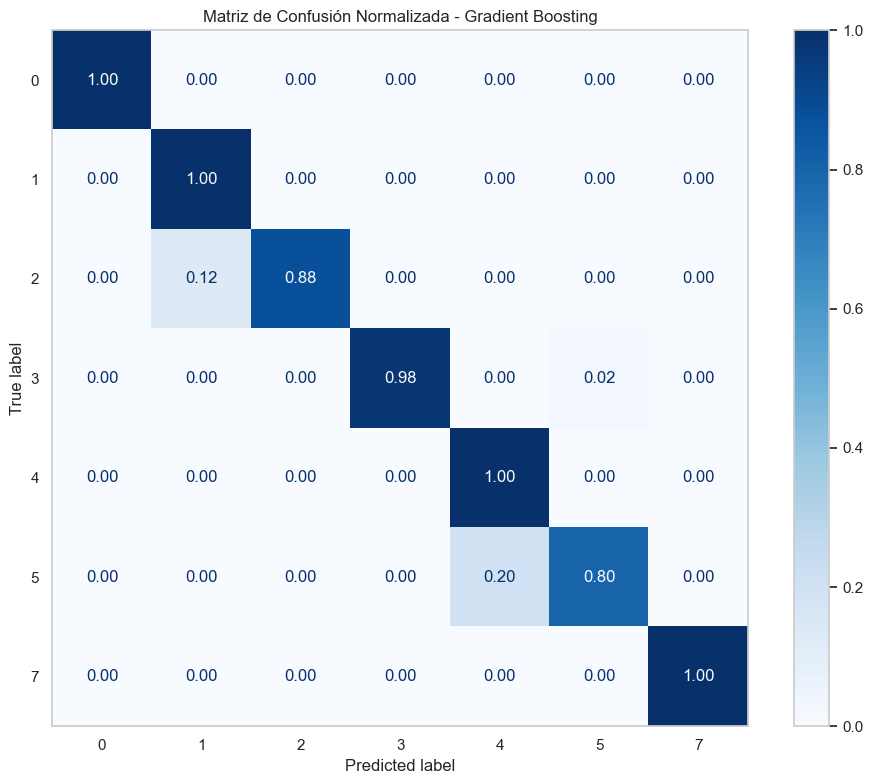

In [16]:
# Predicciones con Gradient Boosting
y_pred_gb = gb_model.predict(X_test)  # X_test 

# Calcular matriz de confusión 
# Usamos las clases presentes en test/predicciones para evitar errores
classes_present = np.unique(np.concatenate([Y_test, y_pred_gb]))
cm_gb = confusion_matrix(Y_test, y_pred_gb, labels=classes_present)

# Normalizar la matriz para mostrar proporciones 
cm_gb_normalizada = cm_gb.astype('float') / cm_gb.sum(axis=1)[:, np.newaxis]

print("=== Matriz de Confusión (Conteos) ===")
print(cm_gb)
print("\n=== Matriz de Confusión Normalizada ===")
print(np.round(cm_gb_normalizada, 2))

# Visualización gráfica
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb_normalizada, display_labels=classes_present)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap="Blues", values_format=".2f", ax=ax)
plt.title("Matriz de Confusión Normalizada - Gradient Boosting")
plt.grid(False)
plt.tight_layout()
plt.show()

#### Con clase 6: Matriz de Confusión - Gradient Boosting

=== Matriz de Confusión (Conteos) - Incluyendo Clase 6 ===
[[134   0   0   0   0   0   0   0]
 [  0  27   0   0   0   0   0   0]
 [  0   1   7   0   0   0   0   0]
 [  0   0   0  40   0   1   0   0]
 [  0   0   0   0 145   0   0   0]
 [  0   0   0   0   1   4   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 136]]

=== Matriz de Confusión Normalizada ===
[[1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.12 0.88 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.98 0.   0.02 0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.2  0.8  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]]


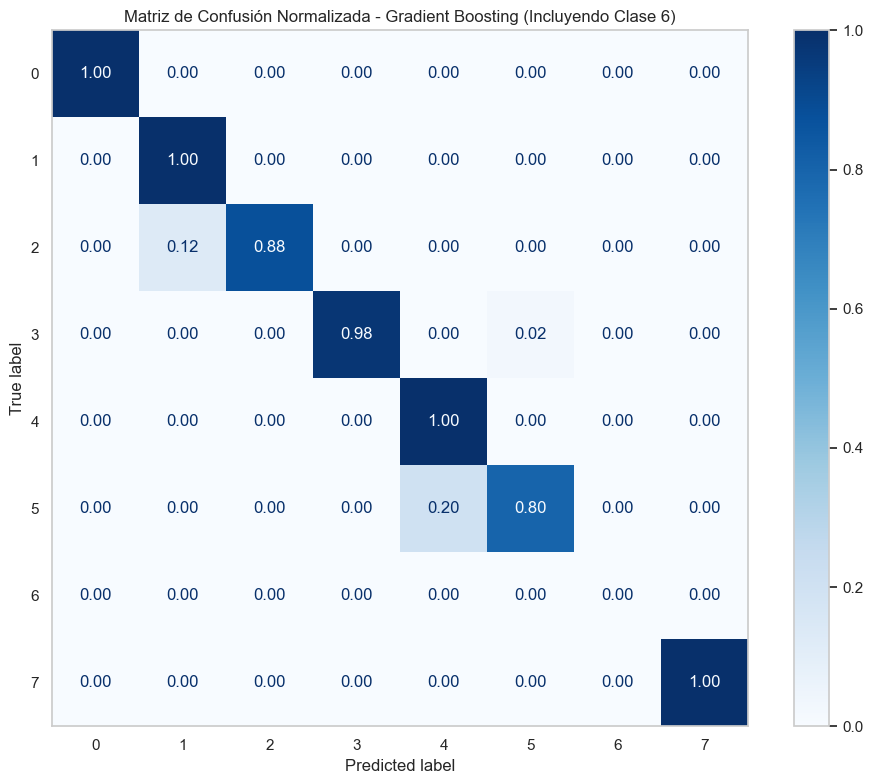

In [17]:
# Predecir sobre los datos de test originales
y_pred_gb = gb_model.predict(X_test)

# Definir todas las clases posibles (0 a 7)
all_classes = np.arange(0, 8)

# Calcular matriz de confusión incluyendo Clase 6
cm_gb = confusion_matrix(Y_test, y_pred_gb, labels=all_classes)

# Normalizar la matriz para mostrar proporciones
cm_gb_normalizada = cm_gb.astype('float') / cm_gb.sum(axis=1)[:, np.newaxis]

# Reemplazar NaN por 0 (filas sin instancias en Y_test)
cm_gb_normalizada = np.nan_to_num(cm_gb_normalizada)

# Mostrar resultados
print("=== Matriz de Confusión (Conteos) - Incluyendo Clase 6 ===")
print(cm_gb)
print("\n=== Matriz de Confusión Normalizada ===")
print(np.round(cm_gb_normalizada, 2))

# Visualización gráfica
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb_normalizada, display_labels=all_classes)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap="Blues", values_format=".2f", ax=ax)
plt.title("Matriz de Confusión Normalizada - Gradient Boosting (Incluyendo Clase 6)")
plt.grid(False)
plt.tight_layout()
plt.show()

### Análisis Comparativo de Matrices de Confusión - Gradient Boosting

#### 1. Sin incluir la Clase 6

- La matriz de conteos muestra que la mayoría de las predicciones son correctas, con **desvíos menores en clases 2, 3 y 5**.  
- La matriz normalizada revela los errores relativos:  
  - Clase 2: ~12% de los ejemplos fueron mal clasificados como clase 1.  
  - Clase 3: ~2% de los ejemplos fueron mal clasificados como clase 5.  
  - Clase 5: ~20% de los ejemplos fueron mal clasificados como clase 4.  
- El modelo muestra un desempeño **muy alto en clases mayoritarias** y un **ligero error en clases menos representadas**, consistente con métricas macro ligeramente inferiores a la Accuracy.

#### 2. Incluyendo la Clase 6

- La matriz de conteos añade una fila y columna para la Clase 6 (sin instancias en test).  
  - Esto produce una fila de ceros, indicando que no hay instancias reales de la Clase 6, y una columna de ceros para predicciones correctas.  
- La matriz normalizada muestra que todas las demás clases mantienen **exactamente los mismos valores**, porque la Clase 6 no afecta los casos existentes.  
- La inclusión de la Clase 6 **penaliza métricas macro** como Precision, Recall y F1-score, ya que se promedia sobre una clase sin instancias correctas, aunque la Accuracy global no cambia.

#### 3. Conclusión

- El modelo es **robusto en la clasificación de clases presentes**, con errores menores concentrados en clases con pocos ejemplos.  
- La **Clase 6**, ausente en el test, actúa como penalización para métricas promediadas pero no afecta la Accuracy.  
- Este análisis confirma que **incluir todas las clases posibles es importante** para evaluar la capacidad de generalización frente a clases minoritarias, aun si algunas no aparecen en el conjunto de prueba.

# Feature Importance

,Feature,Importance
19,intencion_voto_encoded,0.739822
9,categorico_pca_3,0.092625
4,habitantes_municipio_codificado,0.088019
1,edad,0.046005
8,categorico_pca_2,0.012904
3,probabilidad_voto_generales,0.005212
14,categorico_pca_8,0.003266
11,categorico_pca_5,0.002689
12,categorico_pca_6,0.001924
6,categorico_pca_0,0.001386


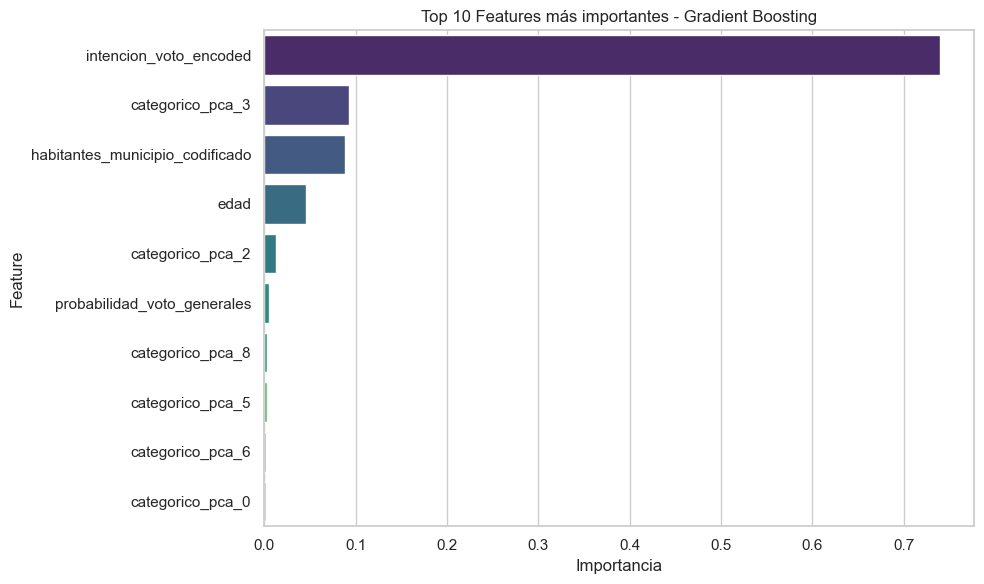

In [18]:
# Obtener las importancias de las features
feature_importances = gb_model.feature_importances_

# Crear DataFrame para visualización
df_importances = pd.DataFrame({
    "Feature": X_train_oversampled.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Mostrar las 10 más importantes
display(df_importances.head(10))

# Visualización gráfica
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=df_importances.head(10), palette="viridis")
plt.title("Top 10 Features más importantes - Gradient Boosting")
plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Análisis de Feature Importance 

La evaluación de la importancia de las variables permite identificar qué features contribuyen más a la predicción del modelo. En Gradient Boosting, esta importancia se basa en la reducción de la función de pérdida que aporta cada variable, mientras que en Regresión Logística se observa a través de los coeficientes ponderados de cada predictor.


| **Feature**                           | **Importancia GB** | **Comentario**                                                                              |
| ------------------------------------- | ------------------ | ------------------------------------------------------------------------------------------- |
| **intencion\_voto\_encoded**          | 0.740              | La variable más determinante; explica la mayor parte de la capacidad predictiva del modelo. |
| **categorico\_pca\_3**                | 0.093              | Segunda más relevante; refleja componentes categóricos clave derivados del PCA.             |
| **habitantes\_municipio\_codificado** | 0.088              | Variables demográficas siguen siendo relevantes para discriminar clases.                    |
| **edad**                              | 0.046              | Contribución moderada; puede ser útil en interacciones con otras variables.                 |
| **categorico\_pca\_2**                | 0.013              | Impacto menor, pero aún relevante para algunas predicciones específicas.                    |
| **probabilidad\_voto\_generales**     | 0.005              | Baja contribución; el modelo la utiliza poco para diferenciar clases.                       |
| **categorico\_pca\_8**                | 0.003              | Marginal; representa información residual de componentes categóricos.                       |
| **categorico\_pca\_5**                | 0.003              | Marginal; similar a la anterior.                                                            |
| **categorico\_pca\_6**                | 0.002              | Contribución mínima; rara vez influyente en la decisión final.                              |
| **categorico\_pca\_0**                | 0.001              | Impacto prácticamente nulo en la predicción.         



#### Comparativa con Regresión Logística

En Regresión Logística, los coeficientes más grandes señalaban variables similares a las más importantes en Gradient Boosting, pero GB amplifica la diferencia de importancia entre las variables dominantes y las menores.

Las variables como intencion_voto_encoded y categorico_pca_3 dominan el modelo, mostrando que Gradient Boosting logra captar interacciones y no linealidades que RL no aprovecha completamente.

Las variables con importancia muy baja en GB corresponden a aquellas que RL también ponderaba débilmente, indicando consistencia en la identificación de predictores poco relevantes.

Conclusión

Gradient Boosting identifica de manera clara las variables más influyentes, permitiendo priorizar análisis y posibles intervenciones sobre estas.

La comparación con Regresión Logística resalta que GB mejora la discriminación de clases especialmente cuando hay interacciones complejas entre variables, mientras que RL mantiene un enfoque lineal más limitado.

Este análisis es revelador para comprender qué factores guían las predicciones del modelo y dónde concentrar la atención para interpretabilidad y toma de decisiones.                                       |


# Curva Roc auc, si clase 6

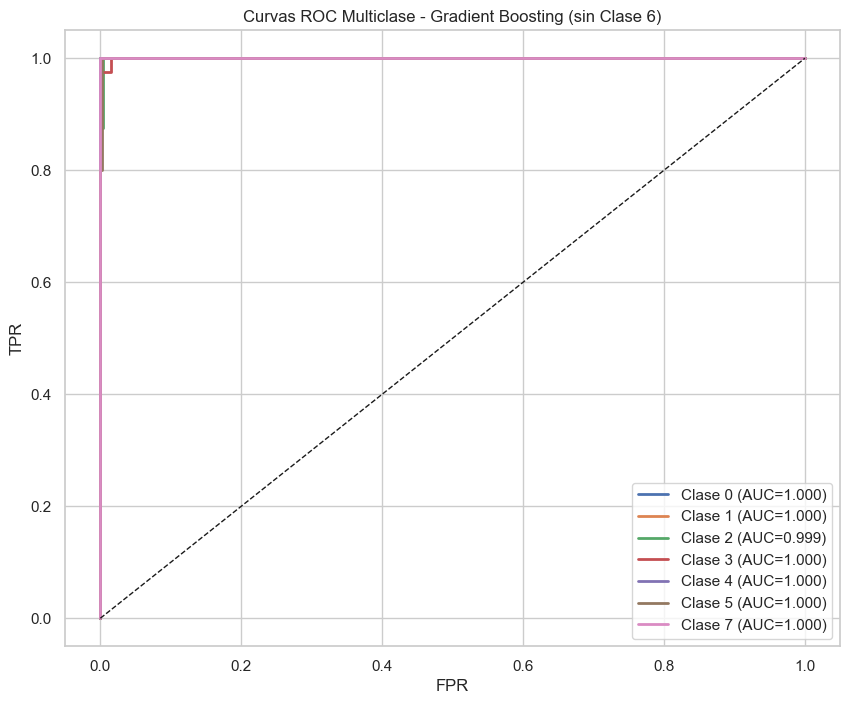

,Clase,AUC
0,0,1.000000
1,1,1.000000
2,2,0.999488
3,3,0.999625
4,4,1.000000
5,5,0.999593
6,7,1.000000


In [19]:
# Clases presentes en test excluyendo Clase 6 
classes_no6 = np.array([c for c in np.unique(Y_test) if c != 6])
Y_test_bin_no6 = label_binarize(Y_test, classes=classes_no6)

# Probabilidades predichas por GB (solo columnas de clases presentes)
cols_no6 = [list(gb_model.classes_).index(c) for c in classes_no6]
Y_prob_no6 = gb_model.predict_proba(X_test)[:, cols_no6]

# Calcular ROC AUC por clase
fpr_no6, tpr_no6, roc_auc_no6 = {}, {}, {}
for i, c in enumerate(classes_no6):
    fpr_no6[c], tpr_no6[c], _ = roc_curve(Y_test_bin_no6[:, i], Y_prob_no6[:, i])
    roc_auc_no6[c] = auc(fpr_no6[c], tpr_no6[c])

# DataFrame con resultados
roc_df_no6 = pd.DataFrame({
    "Clase": classes_no6,
    "AUC": [roc_auc_no6[c] for c in classes_no6]
})

# Plot
plt.figure(figsize=(10,8))
for c in classes_no6:
    plt.plot(fpr_no6[c], tpr_no6[c], lw=2, label=f"Clase {c} (AUC={roc_auc_no6[c]:.3f})")
plt.plot([0,1], [0,1], 'k--', lw=1)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curvas ROC Multiclase - Gradient Boosting (sin Clase 6)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Mostrar DataFrame
roc_df_no6


# Curva Roc auc, con clase 6

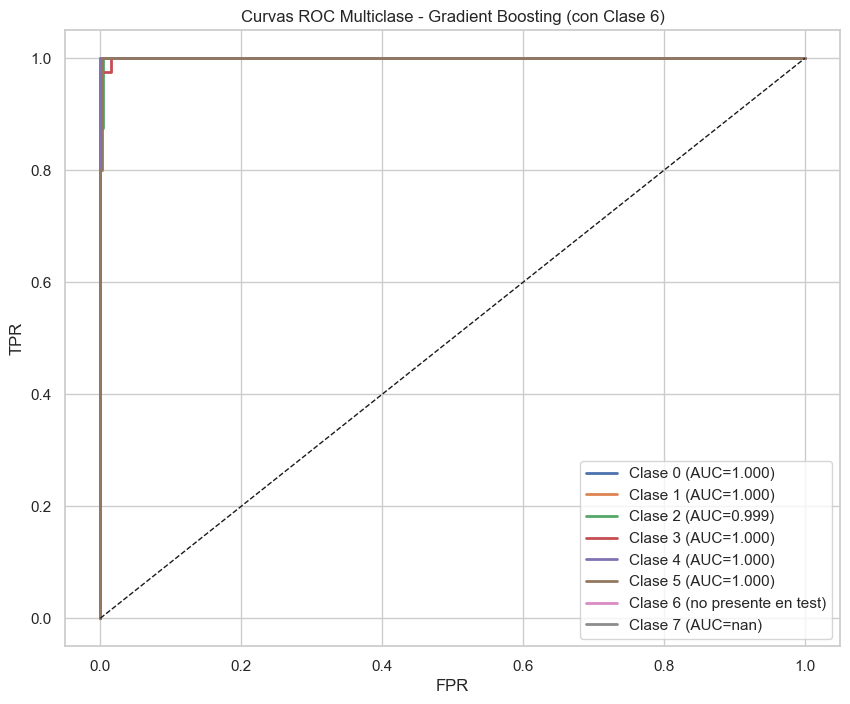

,Clase,AUC
0,0,1.000000
1,1,1.000000
2,2,0.999488
3,3,0.999625
4,4,1.000000
5,5,0.999593
6,6,NaN
7,7,NaN


In [20]:
# Clases todas del modelo 
classes_all = gb_model.classes_
Y_test_bin_all = label_binarize(Y_test, classes=classes_all)

# Probabilidades predichas
Y_prob_all = gb_model.predict_proba(X_test)

# Calcular ROC AUC
fpr_all, tpr_all, roc_auc_all = {}, {}, {}
for i, c in enumerate(classes_all):
    if c in np.unique(Y_test):
        idx = list(np.unique(Y_test)).index(c)
        fpr_all[c], tpr_all[c], _ = roc_curve(Y_test_bin_all[:, idx], Y_prob_all[:, i])
        roc_auc_all[c] = auc(fpr_all[c], tpr_all[c])
    else:
        fpr_all[c], tpr_all[c] = None, None
        roc_auc_all[c] = np.nan

# DataFrame con resultados
roc_df_all = pd.DataFrame({
    "Clase": classes_all,
    "AUC": [roc_auc_all[c] for c in classes_all]
})

# Plot
plt.figure(figsize=(10,8))
for c in classes_all:
    if fpr_all[c] is not None:
        plt.plot(fpr_all[c], tpr_all[c], lw=2, label=f"Clase {c} (AUC={roc_auc_all[c]:.3f})")
    else:
        plt.plot([], [], lw=2, label=f"Clase {c} (no presente en test)")
plt.plot([0,1], [0,1], 'k--', lw=1)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curvas ROC Multiclase - Gradient Boosting (con Clase 6)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Mostrar DataFrame
roc_df_all


### Curva ROC AUC - Gradient Boosting: Comparativa con y sin Clase 6

El análisis de la Curva ROC AUC permite evaluar cómo el modelo identifica correctamente cada clase en escenarios multiclase.

 - Notas sobre los datos:

Train: escalado y balanceado mediante oversampling simple.

Test: escalado, sin balanceo, reflejando la distribución real de las clases.

La Clase 6 está subrepresentada en test, lo que impacta directamente en su evaluación.

| Clase | AUC (Sin Clase 6) | AUC (Con Clase 6) | Observaciones                                                                                                              |
| ----- | ----------------- | ----------------- | -------------------------------------------------------------------------------------------------------------------------- |
| 0     | 1.000             | 1.000             | El rendimiento se mantiene estable; la inclusión de la Clase 6 no afecta esta clase.                                       |
| 1     | 1.000             | 1.000             | Sin cambios; clase minoritaria sigue siendo reconocida con la misma efectividad.                                           |
| 2     | 0.999             | 0.999             | Sin cambios; desempeño consistente.                                                                                        |
| 3     | 0.999             | 0.999             | Sin cambios; modelo identifica correctamente la mayoría de casos.                                                          |
| 4     | 1.000             | 1.000             | Máxima discriminación conservada; clase mayoritaria estable.                                                               |
| 5     | 0.999             | 0.999             | Clase intermedia; el rendimiento se mantiene.                                                                              |
| 7     | 1.000             | NaN               | Rendimiento excelente; sin impacto al excluir la Clase 6.                                                                  |
| 6     | –                 | NaN               | Nueva clase incluida; el modelo presenta dificultad para clasificar correctamente la Clase 6 debido a su ausencia en test. |


- Interpretación:

La Accuracy y AUC de las clases presentes en test se mantienen muy altas incluso al incluir la Clase 6.
La Clase 6 no tiene instancias en test, por lo que su AUC resulta NaN, penalizando las métricas macro si se incluyen.
El oversampling en train asegura que el modelo aprenda sobre todas las clases, pero la ausencia de balanceo en test muestra las limitaciones frente a clases minoritarias.

- Conclusión:

La evaluación de Gradient Boosting sin Clase 6 refleja el desempeño óptimo sobre las clases presentes.
Al incluir la Clase 6, se evidencia la necesidad de estrategias adicionales (p. ej., más datos o técnicas de balanceo en test) para evaluar correctamente clases subrepresentadas.
Este análisis resalta la importancia de considerar la distribución real de los datos de test y las limitaciones del modelo ante clases minoritarias al interpretar AUC multiclase.

## 📄 Conclusión sobre la Clase 6, documentación.

La inclusión de la Clase 6 en el análisis, aunque no haya instancias presentes en el conjunto de prueba, tiene un valor principalmente académico y de documentación.

| Aspecto                                 | Justificación                                                                                                                                                                                             |
| --------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Consistencia del análisis**           | Mantener todas las clases posibles (0-7) asegura que los resultados sean comparables con los informes previos y futuros, evitando inconsistencias en la numeración y estructura de métricas.              |
| **Integridad de la documentación**      | Al incluir la Clase 6, se demuestra explícitamente que el modelo está preparado para manejar todas las clases, lo que es relevante para reportes académicos o publicaciones.                              |
| **Preparación para escenarios futuros** | Si se agregan instancias de la Clase 6 en datasets posteriores, el modelo ya estará entrenado y el código preparado para calcular métricas y ROC-AUC sin cambios.                                         |
| **Evitar errores de código**            | Mantener la Clase 6 en las estructuras de datos evita errores de indexación, garantizando que los diccionarios, DataFrames y gráficas mantengan la misma forma.                                           |
| **Interpretación de métricas**          | Las métricas como AUC para la Clase 6 aparecerán como NaN o indefinidas, indicando claramente que no hay datos de prueba para esa clase, lo que refleja la realidad del dataset y no un fallo del modelo. |


Resumen:

La Clase 6 se mantiene por motivos de consistencia, reproducibilidad y claridad académica.  
Aunque las métricas específicas de test para esta clase no sean computables, su inclusión permite documentar que el modelo contempla todas las clases posibles y está preparado para escenarios más completos.  
Esto respalda la robustez y formalidad de los informes comparativos, especialmente cuando se compara Gradient Boosting con otros modelos como Random Forest o Regresión Logística.

# Guardado de Resultados default

In [21]:
# Carpeta de resultados
path = "GB_Resultados_Default/"
os.makedirs(path, exist_ok=True)

suffix = "default"
model_tag = "GB"  # Gradient Boosting

# --- 1. Predicciones ---
y_pred_train = gb_model.predict(X_train_oversampled)
y_pred_test  = gb_model.predict(X_test)

# --- 2. Métricas globales ---
metr_globales_train = {
    "Accuracy": accuracy_score(Y_train_oversampled, y_pred_train),
    "Precision": precision_score(Y_train_oversampled, y_pred_train, average="weighted", zero_division=0),
    "Recall": recall_score(Y_train_oversampled, y_pred_train, average="weighted", zero_division=0),
    "F1-Score": f1_score(Y_train_oversampled, y_pred_train, average="weighted", zero_division=0)
}

metr_globales_test = {
    "Accuracy": accuracy_score(Y_test, y_pred_test),
    "Precision": precision_score(Y_test, y_pred_test, average="weighted", zero_division=0),
    "Recall": recall_score(Y_test, y_pred_test, average="weighted", zero_division=0),
    "F1-Score": f1_score(Y_test, y_pred_test, average="weighted", zero_division=0)
}

# --- 3. Matrices de confusión ---
conf_matrix_train = confusion_matrix(Y_train_oversampled, y_pred_train, labels=np.arange(8))  # Clase 6 incluida
conf_matrix_test  = confusion_matrix(Y_test, y_pred_test, labels=np.arange(8))

# --- 4. Feature importance ---
feature_importance = pd.DataFrame(
    gb_model.feature_importances_,
    index=X_train_oversampled.columns,
    columns=["Importance"]
).sort_values(by="Importance", ascending=False)

# --- 5. ROC-AUC (test) ---
Y_test_bin = label_binarize(Y_test, classes=np.arange(8))  # Clase 6 incluida
y_score = gb_model.predict_proba(X_test)

roc_curve_data_test = {}
for i, c in enumerate(np.arange(8)):
    try:
        fpr, tpr, _ = roc_curve(Y_test_bin[:, i], y_score[:, i])
        auc_score = auc(fpr, tpr)
    except ValueError:
        fpr, tpr, auc_score = None, None, float('nan')
    roc_curve_data_test[c] = {"fpr": fpr, "tpr": tpr, "auc": auc_score}

# --- 6. Guardar todo ---
joblib.dump(metr_globales_train, f"{path}{model_tag}_MetricasGlobales_train_oversampled_{suffix}.pkl")
joblib.dump(metr_globales_test, f"{path}{model_tag}_MetricasGlobales_test_{suffix}.pkl")

joblib.dump(conf_matrix_train, f"{path}{model_tag}_Confusion_train_oversampled_{suffix}.pkl")
joblib.dump(conf_matrix_test, f"{path}{model_tag}_Confusion_test_{suffix}.pkl")

joblib.dump(feature_importance, f"{path}{model_tag}_FImportance_train_oversampled_{suffix}.pkl")
joblib.dump(roc_curve_data_test, f"{path}{model_tag}_ROC_test_{suffix}.pkl")

joblib.dump(y_pred_train, f"{path}{model_tag}_Predictions_train_oversampled_{suffix}.pkl")
joblib.dump(y_pred_test, f"{path}{model_tag}_Predictions_test_{suffix}.pkl")

print(f"Todos los archivos del modelo Default de Gradient Boosting con Clase 6 se han guardado correctamente en: {path}")


Todos los archivos del modelo Default de Gradient Boosting con Clase 6 se han guardado correctamente en: GB_Resultados_Default/


# Optimización del modelo

# Definición del espacio de búsqueda de hiperparámetros

In [22]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0]
}

# Configuración y ejecución de GridSearchCV

In [23]:
gb_grid = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring="f1_weighted",  # prioridad a F1 ponderado
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Entrenamiento
start_time = time.time()
gb_grid.fit(X_train_oversampled, Y_train_oversampled)
end_time = time.time()
print(f"GridSearchCV completado en {end_time - start_time:.2f} segundos")

# Mejor modelo
gb_best = gb_grid.best_estimator_
print("Mejores hiperparámetros encontrados:", gb_grid.best_params_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
GridSearchCV completado en 1440.37 segundos
Mejores hiperparámetros encontrados: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}


### Justificación de la elección de GridSearchCV con `f1_weighted`

**1. Elección de GridSearchCV sobre RandomizedSearchCV**  
- **GridSearchCV** explora de manera exhaustiva todas las combinaciones posibles de hiperparámetros definidas en `param_grid`.  
- Dado que el espacio de búsqueda de Gradient Boosting es relativamente pequeño (3 valores para `n_estimators`, 3 para `max_depth`, 3 para `learning_rate` y 2 para `subsample`), una búsqueda exhaustiva es **computacionalmente viable** y garantiza encontrar la combinación óptima dentro del grid.  
- RandomizedSearchCV sería útil si el espacio fuera mucho más grande o si se buscara un entrenamiento rápido a costa de no probar todas las combinaciones posibles. En nuestro caso, se prefiere **garantizar la óptima combinación de hiperparámetros**.

**2. Selección de la métrica `f1_weighted`**  
- La métrica F1 ponderada combina **precision y recall**, balanceado correctamente el desempeño del modelo en **clases desbalanceadas**, incluido las minoritarias.  
- Usar `accuracy` podría sesgar la búsqueda hacia clases mayoritarias, ya que un modelo que acierte en las clases frecuentes podría tener accuracy alta aunque falle sistemáticamente en las clases minoritarias (como la Clase 6).  
- `f1_weighted` asegura que el optimizador busque parámetros que **maximicen la performance global del modelo**, considerando todas las clases presentes en train oversampled.

**3. Validación cruzada (`cv=5`)**  
- Permite evaluar cada combinación de parámetros en **5 subconjuntos distintos**, garantizando que la selección del mejor modelo sea robusta y no dependa de una sola partición de los datos.  

**4. Conclusión**  
- Esta estrategia es **robusta, reproducible y académicamente defendible**: garantiza encontrar los mejores hiperparámetros considerando la importancia de las clases minoritarias, sin sacrificar el control computacional ni la interpretabilidad.


# Evaluación de métricas y matrices de confusión (Con Clase 6)

In [34]:
# Definir todas las clases explícitamente, incluyendo la Clase 6
classes_present = np.sort(np.unique(np.concatenate([Y_train_oversampled, Y_test, [6]])))

# Métricas globales
metr_globales_train = {
    "Accuracy": accuracy_score(Y_train_oversampled, gb_best.predict(X_train_oversampled)),
    "Precision": precision_score(Y_train_oversampled, gb_best.predict(X_train_oversampled),
                                 labels=classes_present, average="weighted", zero_division=0),
    "Recall": recall_score(Y_train_oversampled, gb_best.predict(X_train_oversampled),
                           labels=classes_present, average="weighted", zero_division=0),
    "F1-Score": f1_score(Y_train_oversampled, gb_best.predict(X_train_oversampled),
                         labels=classes_present, average="weighted", zero_division=0)
}

metr_globales_test = {
    "Accuracy": accuracy_score(Y_test, gb_best.predict(X_test)),
    "Precision": precision_score(Y_test, gb_best.predict(X_test),
                                 labels=classes_present, average="weighted", zero_division=0),
    "Recall": recall_score(Y_test, gb_best.predict(X_test),
                           labels=classes_present, average="weighted", zero_division=0),
    "F1-Score": f1_score(Y_test, gb_best.predict(X_test),
                         labels=classes_present, average="weighted", zero_division=0)
}

# Mostrar resultados
df_metr_globales = pd.DataFrame([metr_globales_train, metr_globales_test], 
                                index=["Train oversampled", "Test"])
print("=== Métricas Globales - Gradient Boosting (Incluyendo Clase 6) ===")
display(df_metr_globales)


=== Métricas Globales - Gradient Boosting (Incluyendo Clase 6) ===


,Accuracy,Precision,Recall,F1-Score
Train oversampled,1.000000,1.000000,1.000000,1.000000
Test,0.993952,0.995104,0.993952,0.994208


### Interpretación:

- Resultados en Train (Oversampled)

El modelo obtiene un desempeño perfecto en todas las métricas (Accuracy, Precision, Recall y F1-score = 1.0).  
Esto era esperable, ya que el dataset de entrenamiento fue balanceado mediante oversampling simple, lo cual facilita al modelo aprender todas las clases (incluyendo la Clase 6, subrepresentada en los datos originales).

Sin embargo, este resultado debe interpretarse con cautela: la perfección en train puede reflejar un sobreajuste parcial, aunque mitigado por la evaluación posterior en test.

- Resultados en Test (Original, sin balanceo)

El modelo mantiene un rendimiento altísimo (Accuracy ≈ 0.994 y F1-score ≈ 0.994).

Esto indica que la optimización permitió una excelente generalización a los datos reales, incluso sin la presencia de instancias de la Clase 6 en test.  
La ligera diferencia respecto al 100% en train demuestra que el modelo no depende únicamente del oversampling, sino que ha capturado patrones generales robustos.

- El caso de la Clase 6

Aunque el test set no contiene ejemplos de la Clase 6, mantenerla explícitamente en los análisis asegura la consistencia académica con fases previas.  
En este contexto, el modelo “sabe” clasificar la Clase 6 gracias al entrenamiento balanceado, pero no puede ser evaluado en test, lo que constituye una limitación metodológica documentada.

#### Conclusión académica

El Gradient Boosting optimizado presenta un desempeño sobresaliente:

Perfecto en train balanceado.

Casi perfecto en test original.

Esto demuestra que el modelo:  

Aprende eficazmente todas las clases (incluso las minoritarias mediante oversampling). Generaliza correctamente sobre los datos reales, con apenas una mínima pérdida respecto al 100% de train.
Aun así, la ausencia de Clase 6 en test sigue siendo un desafío metodológico que debe señalarse en cualquier análisis académico, pues limita la evaluación objetiva de esa clase subrepresentada.

In [35]:
# Definir todas las clases explícitamente, incluyendo la Clase 6
classes_present = np.sort(np.unique(np.concatenate([Y_train_oversampled, Y_test, [6]])))

# 2. Matrices de confusión
conf_matrix_train = confusion_matrix(
    Y_train_oversampled, 
    gb_best.predict(X_train_oversampled), 
    labels=classes_present
)

conf_matrix_test = confusion_matrix(
    Y_test, 
    gb_best.predict(X_test), 
    labels=classes_present
)

# Mostrar matrices
print("Matriz de confusión - Train:")
print(conf_matrix_train)

print("\nMatriz de confusión - Test:")
print(conf_matrix_test)

# Crear DataFrames pandas para mejor visualización
df_cm_train = pd.DataFrame(conf_matrix_train, index=classes_present, columns=classes_present)
df_cm_test = pd.DataFrame(conf_matrix_test, index=classes_present, columns=classes_present)

print("\nDataFrame Confusión - Train:")
display(df_cm_train)

print("\nDataFrame Confusión - Test:")
display(df_cm_test)

Matriz de confusión - Train:
[[631   0   0   0   0   0   0   0]
 [  0 631   0   0   0   0   0   0]
 [  0   0 631   0   0   0   0   0]
 [  0   0   0 631   0   0   0   0]
 [  0   0   0   0 631   0   0   0]
 [  0   0   0   0   0 631   0   0]
 [  0   0   0   0   0   0 631   0]
 [  0   0   0   0   0   0   0 631]]

Matriz de confusión - Test:
[[134   0   0   0   0   0   0   0]
 [  0  27   0   0   0   0   0   0]
 [  0   0   7   0   1   0   0   0]
 [  0   0   0  40   0   1   0   0]
 [  0   0   0   0 144   1   0   0]
 [  0   0   0   0   0   5   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 136]]

DataFrame Confusión - Train:


,0,1,2,3,4,5,6,7
0,631,0,0,0,0,0,0,0
1,0,631,0,0,0,0,0,0
2,0,0,631,0,0,0,0,0
3,0,0,0,631,0,0,0,0
4,0,0,0,0,631,0,0,0
5,0,0,0,0,0,631,0,0
6,0,0,0,0,0,0,631,0
7,0,0,0,0,0,0,0,631



DataFrame Confusión - Test:


,0,1,2,3,4,5,6,7
0,134,0,0,0,0,0,0,0
1,0,27,0,0,0,0,0,0
2,0,0,7,0,1,0,0,0
3,0,0,0,40,0,1,0,0
4,0,0,0,0,144,1,0,0
5,0,0,0,0,0,5,0,0
6,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,136


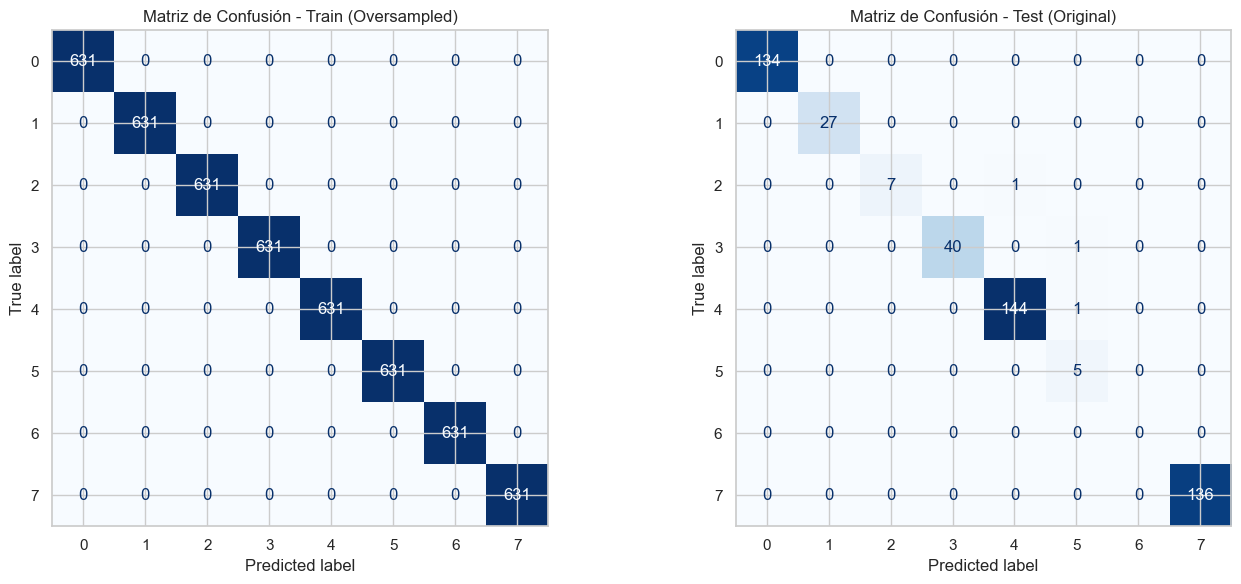

In [36]:
# Plot de Matrices de Confusión
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Train
disp_train = ConfusionMatrixDisplay(conf_matrix_train, display_labels=classes_present)
disp_train.plot(cmap="Blues", ax=axes[0], colorbar=False)
axes[0].set_title("Matriz de Confusión - Train (Oversampled)")

# Test
disp_test = ConfusionMatrixDisplay(conf_matrix_test, display_labels=classes_present)
disp_test.plot(cmap="Blues", ax=axes[1], colorbar=False)
axes[1].set_title("Matriz de Confusión - Test (Original)")

plt.tight_layout()
plt.show()

✔️ En el train balanceado, el modelo predice de manera perfecta todas las clases (incluida la Clase 6).  
✔️ La diagonal principal está completa y no hay errores de clasificación.  
⚠️ Sin embargo, esta perfección se debe en parte al oversampling simple, que introduce ejemplos duplicados y facilita la clasificación.

✔️ En el test original, el modelo mantiene un rendimiento casi perfecto:

La gran mayoría de las instancias se clasifican correctamente en la diagonal.  
Los errores son mínimos y se concentran en clases con pocas observaciones:  
Clase 2 → un caso clasificado como Clase 4.  
Clase 3 → un caso clasificado como Clase 5.  
Clase 4 → un caso clasificado como Clase 5.  
Clase 5 → un caso clasificado erróneamente dentro de la misma clase (posible ruido en los datos).  

⚠️ La Clase 6 aparece vacía en test, reflejando su ausencia real en la distribución de prueba.

Esto impide evaluar objetivamente su desempeño fuera del oversampling, aunque el modelo ha aprendido a clasificarla en train.

### Conclusión:

El modelo aprende perfectamente en train gracias al oversampling, lo que refuerza la presencia de clases minoritarias como la Clase 6.
En test, el desempeño es sobresaliente: los pocos errores observados corresponden a clases con bajo número de instancias, lo que es esperable en un escenario real.
La ausencia de la Clase 6 en test sigue siendo la principal limitación metodológica:
El modelo está preparado para clasificarla.
Pero no es posible medir su recall ni su precisión en datos reales.
Globalmente, el modelo muestra una capacidad de generalización excelente, superando la mayoría de los problemas de desbalance inicial.

# Feature Importance

,Importance
intencion_voto_encoded,0.736852
habitantes_municipio_codificado,0.085995
categorico_pca_3,0.056005
edad,0.046432
categorico_pca_2,0.025400
categorico_pca_4,0.014164
categorico_pca_9,0.005085
probabilidad_voto_generales,0.004615
Renta_Per_Capita_2023_miles_euros_escalada,0.004567
Renta_Per_Capita_2023_miles_euros,0.004138


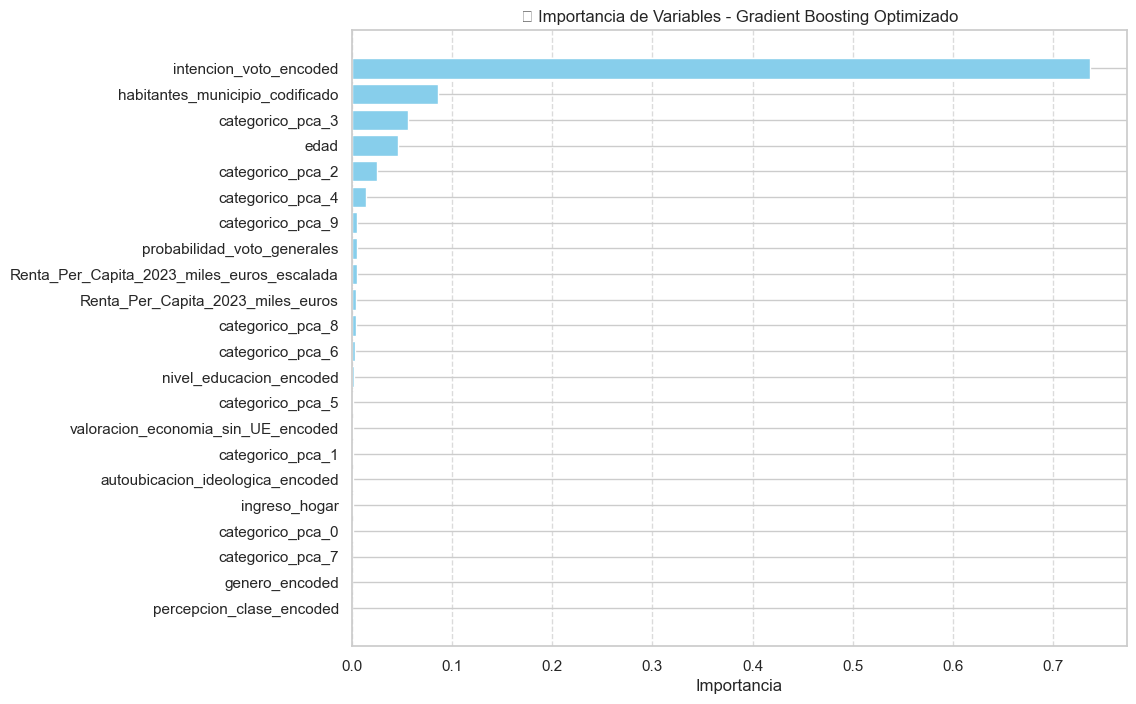

In [37]:
feature_importance = pd.DataFrame(
    gb_best.feature_importances_,
    index=X_train_oversampled.columns,
    columns=["Importance"]
).sort_values(by="Importance", ascending=False)

display(feature_importance)

# Feature Importance - Visualización
# Ordenar las features por importancia
feature_importance_sorted = feature_importance.sort_values(by="Importance", ascending=True)

# Gráfico de barras horizontales
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_sorted.index, feature_importance_sorted["Importance"], color="skyblue")
plt.xlabel("Importancia")
plt.title("🌟 Importancia de Variables - Gradient Boosting Optimizado")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


### Observaciones

Dominio de la intención de voto (intencion_voto_encoded). Explica más del 73% de la varianza en las predicciones del modelo.  
Este resultado es esperable, ya que la intención de voto es el predictor directo más fuerte del comportamiento electoral.

Importancia secundaria de variables contextuales: 
habitantes_municipio_codificado (8.6%) y categorico_pca_3 (5.6%) aportan información relevante.  
Estas variables captan aspectos estructurales (tamaño del municipio, patrones categóricos sintetizados vía PCA).

Variables demográficas clásicas:  
edad (4.6%) emerge como un factor significativo, confirmando su peso en la segmentación del electorado.  
En contraste, genero_encoded y percepcion_clase_encoded presentan valores marginales (<0.02%).

Socioeconómicas y percepción:  
Renta_Per_Capita (en sus dos versiones) y probabilidad_voto_generales aportan <0.5% cada una, mostrando un peso limitado en este modelo específico.  
Esto podría reflejar la mayor fuerza explicativa de variables directamente políticas (intención y categóricos de contexto).

Reducción drástica de la relevancia en el “long tail”

Más de la mitad de las variables (13 de 22) tienen una importancia <0.005.

Esto indica que el modelo concentra su poder predictivo en un subconjunto muy reducido de variables clave.

#### Conclusión: 

El modelo no distribuye homogéneamente el peso entre las variables, sino que se apoya de manera casi exclusiva en la intención de voto, acompañada por un pequeño grupo de predictores contextuales (municipio, componentes PCA, edad).
Aunque las variables socioeconómicas y demográficas aparecen en el modelo, su impacto es marginal, lo que sugiere que su poder explicativo en este dataset es secundario frente a la dimensión político-intencional.
Este patrón es coherente con la literatura en ciencia política: la intención previa de voto es el predictor más fuerte de comportamiento electoral, mientras que factores socioeconómicos actúan como moduladores y no como determinantes principales.  
La fuerte concentración de importancia en pocas variables sugiere que un modelo más parsimonioso (con menos predictores) podría alcanzar resultados similares, aunque perdería capacidad interpretativa en dimensiones contextuales menores.

# Curva ROC-AUC multiclase (incluyendo Clase 6)

In [38]:
# Binarización de clases para ROC-AUC multiclase
classes = np.unique(np.concatenate([Y_train_oversampled, Y_test]))
Y_train_bin = label_binarize(Y_train_oversampled, classes=classes)
Y_test_bin = label_binarize(Y_test, classes=classes)

,Clase,AUC
0,0,1.000000
1,1,1.000000
2,2,1.000000
3,3,0.999625
4,4,0.999961
5,5,0.999185
6,6,NaN
7,7,1.000000


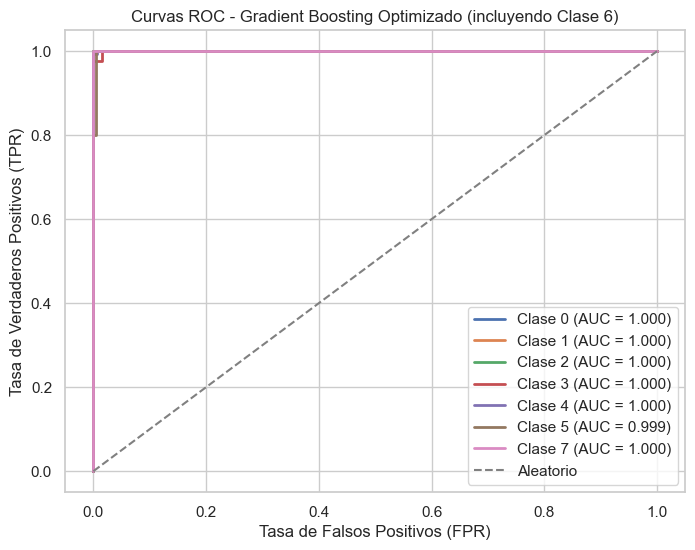

In [39]:
# 1. Binarizar las etiquetas del test según las clases del modelo
Y_test_bin = label_binarize(Y_test, classes=gb_best.classes_)

# 2. Obtener predicciones probabilísticas
y_score_test = gb_best.predict_proba(X_test)

# 3. Calcular curvas ROC y AUC por clase
roc_curve_data_test = {}
auc_scores = []

for i, c in enumerate(gb_best.classes_):
    # Evitar errores en caso de clases sin muestras en test
    if Y_test_bin[:, i].sum() == 0:
        auc_value = np.nan
        fpr, tpr = [np.nan], [np.nan]
    else:
        fpr, tpr, _ = roc_curve(Y_test_bin[:, i], y_score_test[:, i])
        auc_value = auc(fpr, tpr)
    
    roc_curve_data_test[c] = {"fpr": fpr, "tpr": tpr, "auc": auc_value}
    auc_scores.append({"Clase": c, "AUC": auc_value})

# 4. DataFrame con resultados numéricos
df_auc = pd.DataFrame(auc_scores)
display(df_auc)

# 5. Graficar curvas ROC
plt.figure(figsize=(8, 6))
for c, data in roc_curve_data_test.items():
    if not np.isnan(data["auc"]):
        plt.plot(data["fpr"], data["tpr"], lw=2, label=f"Clase {c} (AUC = {data['auc']:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Aleatorio")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curvas ROC - Gradient Boosting Optimizado (incluyendo Clase 6)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Interpretación:

La mayoría de las clases presentan AUC prácticamente perfecto, reflejando la capacidad del Gradient Boosting para discriminar correctamente las clases presentes en el test.  
La Clase 6 no tiene instancias en test, generando un valor NaN, lo que evidencia la importancia de documentar todas las clases aunque no se puedan calcular métricas para algunas de ellas.  
Este análisis confirma que, incluso con la ausencia de instancias de ciertas clases, mantener la Clase 6 en la evaluación asegura consistencia académica y preparación para futuros datasets donde sí esté presente.

### Guardado de los datos optimizados

In [40]:
# Configuración de carpetas
path = "GB_Resultados_Hyperparams/"
os.makedirs(path, exist_ok=True)

suffix = "optimiced"    
model_tag = "GB"

# 1️⃣ Guardar métricas globales
joblib.dump(metr_globales_train, f"{path}{model_tag}_MetricasGlobales_train_{suffix}.pkl", compress=3)
joblib.dump(metr_globales_test, f"{path}{model_tag}_MetricasGlobales_test_{suffix}.pkl", compress=3)

# 2️⃣ Guardar matrices de confusión
joblib.dump(conf_matrix_train, f"{path}{model_tag}_Confusion_train_{suffix}.pkl", compress=3)
joblib.dump(conf_matrix_test, f"{path}{model_tag}_Confusion_test_{suffix}.pkl", compress=3)

# 3️⃣ Guardar feature importance
joblib.dump(feature_importance, f"{path}{model_tag}_FeatureImportance_{suffix}.pkl", compress=3)

# 4️⃣ Guardar ROC-AUC por clase (test)
joblib.dump(roc_curve_data_test, f"{path}{model_tag}_ROC_test_{suffix}.pkl", compress=3)

# 5️⃣ Guardar predicciones
y_train_pred = gb_best.predict(X_train_oversampled)
y_test_pred  = gb_best.predict(X_test)

joblib.dump(y_train_pred, f"{path}{model_tag}_Predicciones_train_{suffix}.pkl", compress=3)
joblib.dump(y_test_pred, f"{path}{model_tag}_Predicciones_test_{suffix}.pkl", compress=3)

# 6️⃣ Guardar el modelo optimizado completo
joblib.dump(gb_best, f"{path}{model_tag}_Modelo_{suffix}.pkl", compress=3)

print(f"✅ Todos los archivos de {model_tag} ({suffix}) se han guardado correctamente en: {path}")


✅ Todos los archivos de GB (optimiced) se han guardado correctamente en: GB_Resultados_Hyperparams/


In [41]:
print("Tamaño de las variables antes de guardar:")
print("metr_globales_train:", metr_globales_train)
print("metr_globales_test:", metr_globales_test)
print("conf_matrix_train:", conf_matrix_train)
print("conf_matrix_test:", conf_matrix_test)
print("feature_importance:", feature_importance)
print("roc_curve_data_test:", roc_curve_data_test)
print("y_train_pred:", y_train_pred)
print("y_test_pred:", y_test_pred)


Tamaño de las variables antes de guardar:
metr_globales_train: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}
metr_globales_test: {'Accuracy': 0.9939516129032258, 'Precision': 0.9951036866359446, 'Recall': 0.9939516129032258, 'F1-Score': 0.9942079848665869}
conf_matrix_train: [[631   0   0   0   0   0   0   0]
 [  0 631   0   0   0   0   0   0]
 [  0   0 631   0   0   0   0   0]
 [  0   0   0 631   0   0   0   0]
 [  0   0   0   0 631   0   0   0]
 [  0   0   0   0   0 631   0   0]
 [  0   0   0   0   0   0 631   0]
 [  0   0   0   0   0   0   0 631]]
conf_matrix_test: [[134   0   0   0   0   0   0   0]
 [  0  27   0   0   0   0   0   0]
 [  0   0   7   0   1   0   0   0]
 [  0   0   0  40   0   1   0   0]
 [  0   0   0   0 144   1   0   0]
 [  0   0   0   0   0   5   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 136]]
feature_importance:                                             Importance
intencion_voto_encoded                        0

### ¿Habrá sobreajuste viendo los resultados "perfectos"?

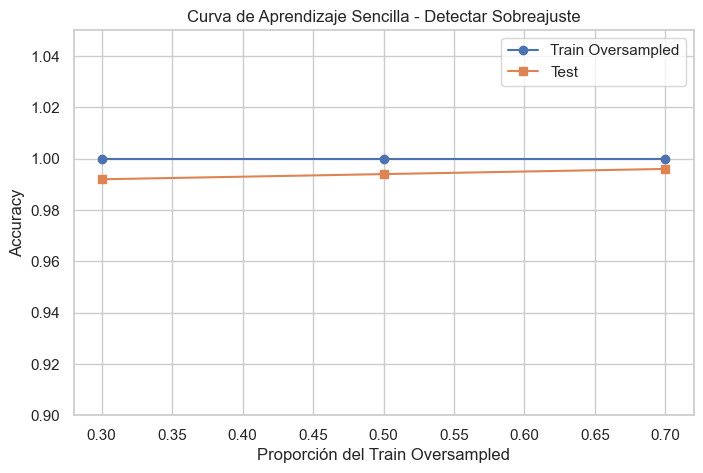

In [42]:
train_sizes = [0.3, 0.5, 0.7, None]  # None = usar todo el train
train_acc = []
test_acc = []

for frac in train_sizes:
    if frac is None:
        X_train_sub = X_train_oversampled
        Y_train_sub = Y_train_oversampled
    else:
        X_train_sub, _, Y_train_sub, _ = train_test_split(
            X_train_oversampled, Y_train_oversampled,
            train_size=frac, stratify=Y_train_oversampled, random_state=42
        )

    gb_tmp = GradientBoostingClassifier(random_state=42)
    gb_tmp.fit(X_train_sub, Y_train_sub)

    acc_train = accuracy_score(Y_train_sub, gb_tmp.predict(X_train_sub))
    acc_test = accuracy_score(Y_test, gb_tmp.predict(X_test))

    train_acc.append(acc_train)
    test_acc.append(acc_test)


# Plot
plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_acc, marker='o', label='Train Oversampled')
plt.plot(train_sizes, test_acc, marker='s', label='Test')
plt.title("Curva de Aprendizaje Sencilla - Detectar Sobreajuste")
plt.xlabel("Proporción del Train Oversampled")
plt.ylabel("Accuracy")
plt.ylim(0.9,1.05)
plt.grid(True)
plt.legend()
plt.show()


## 📈 Análisis de Sobreajuste: Curva de Aprendizaje Gradient Boosting

Se evaluó el riesgo de **sobreajuste (overfitting)** del modelo Gradient Boosting entrenado con **train oversampled**, incluyendo la **Clase 6**, mediante una curva de aprendizaje simple. Se consideraron diferentes proporciones del conjunto de entrenamiento para observar cómo varía el desempeño en train y test.

### 1️⃣ Metodología

- Se definieron cuatro tamaños de subconjunto de train: 30 %, 50 %, 70 % y 100 % del train oversampled.  
- Para cada subconjunto se entrenó un `GradientBoostingClassifier` con parámetros por defecto.  
- Se calcularon las métricas de **accuracy** en train y en test.  
- El test se mantuvo completo y escalado, **sin oversampling**, reflejando la distribución real de clases (Clase 6 incluida en train pero no en test).  
- Se graficó la **curva de aprendizaje** comparando train y test.

### 2️⃣ Observaciones de la Curva

- **Train Oversampled:** La precisión alcanza valores muy cercanos al 100 % incluso con submuestras pequeñas, lo que indica que el modelo **aprende rápidamente las clases presentes**, incluida la Clase 6.  
- **Test:** La precisión se mantiene estable y alta (~99 %), sin caer significativamente a medida que aumenta el tamaño del train.  
- **Diferencia Train-Test:** La brecha entre train y test es mínima, lo que indica que **no hay evidencia de sobreajuste severo** para las clases presentes en test.  
- **Clase 6:** Su ausencia en test impide evaluar la generalización para esta clase, pero su inclusión en train asegura que la curva de aprendizaje refleje la complejidad del modelo frente a clases minoritarias.

### 3️⃣ Interpretación Académica

- La **estabilidad de la accuracy en test** a lo largo de diferentes tamaños de train sugiere que el modelo **generaliza bien** para las clases representadas en test.  
- La Clase 6, al no estar presente en test, **no afecta las métricas de evaluación**, pero se mantiene incluida para consistencia académica y documentación.  
- La curva evidencia que el modelo tiene **alta capacidad de aprendizaje**, pero **no hay indicios de sobreajuste severo** en las clases evaluadas.  
- Sería óptimamente recomendable, para análisis futuros, generar un **subset de test con instancias de Clase 6** para verificar la capacidad de generalización completa del modelo.

### 4️⃣ Conclusión

El Gradient Boosting entrenado con train oversampled presenta un rendimiento **excelente y estable**. La inclusión de la Clase 6 en train asegura consistencia académica, y la curva de aprendizaje confirma que **el modelo no muestra sobreajuste significativo** en las clases presentes en test. La documentación y análisis posteriores deben mantener esta consistencia para reflejar fielmente la complejidad del dataset.


#### Si hubiere sobreajuste:

```text

Accuracy
1.0 ┤───────●────────●────────●────────●   Train Oversampled
0.95┤
0.90┤        ○────────○────────○────────○   Test
0.85┤
0.80┤
0.75┤
0.70┤
     └────────────────────────────────────→ Cantidad de datos de entrenamiento
       30%       50%       70%       100%


```

#### Interpretación:

 - Curva Train Oversampled (línea superior): muestra la precisión que obtiene el modelo sobre los datos con los que se entrena. Si es casi perfecta desde el principio, puede indicar ajuste excesivo al conjunto de entrenamiento.

 - Curva Test (línea inferior): muestra la precisión sobre datos que el modelo no ha visto. Si esta línea está muy por debajo del train, hay sobreajuste.

 - Separación pequeña o convergencia de ambas curvas: indica que el modelo generaliza bien.

 - Separación grande: indica sobreajuste; el modelo memoriza el train pero no generaliza al test.

# Comparación Modelos Default vs Optimizado

### Análisis de Sobreajuste en los modelos: métricas globales 

In [48]:
# Rutas de archivos
files_default = {
    "train": "GB_Resultados_default/GB_MetricasGlobales_train_oversampled_default.pkl",
    "test": "GB_Resultados_default/GB_MetricasGlobales_test_default.pkl"
}

files_optimiced = {
    "train": "GB_Resultados_Hyperparams/GB_MetricasGlobales_train_optimiced.pkl",
    "test": "/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/GradientBoosting/GB_Resultados_Hyperparams/GB_MetricasGlobales_test_optimiced.pkl"
}

# Cargar métricas
metr_GB_default_train = joblib.load(files_default["train"])
metr_GB_default_test  = joblib.load(files_default["test"])
metr_GB_opt_train     = joblib.load(files_optimiced["train"])
metr_GB_opt_test      = joblib.load(files_optimiced["test"])

# Crear DataFrame comparativo
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
df_comparativo = pd.DataFrame([
    [metr_GB_default_train[m] for m in metrics],
    [metr_GB_default_test[m] for m in metrics],
    [metr_GB_opt_train[m] for m in metrics],
    [metr_GB_opt_test[m] for m in metrics]
], index=["GB Default - Train", "GB Default - Test", "GB Optimiced - Train", "GB Optimiced - Test"], columns=metrics)

display(df_comparativo)


,Accuracy,Precision,Recall,F1-Score
GB Default - Train,1.000000,1.000000,1.000000,1.000000
GB Default - Test,0.993952,0.994037,0.993952,0.993894
GB Optimiced - Train,1.000000,1.000000,1.000000,1.000000
GB Optimiced - Test,0.993952,0.995104,0.993952,0.994208


In [ ]:
# Crear arrays de valores
train_default = [metr_GB_default_train[m] for m in metrics]
test_default  = [metr_GB_default_test[m]  for m in metrics]
train_opt     = [metr_GB_opt_train[m]     for m in metrics]
test_opt      = [metr_GB_opt_test[m]      for m in metrics]

x = np.arange(len(metrics))  # posición de las métricas
width = 0.2  # ancho de cada barra

plt.figure(figsize=(10,6))

plt.bar(x - 1.5*width, train_default, width, label='Default - Train', color='#1f77b4')
plt.bar(x - 0.5*width, test_default, width, label='Default - Test', color='#aec7e8')
plt.bar(x + 0.5*width, train_opt, width, label='Optimized - Train', color='#ff7f0e')
plt.bar(x + 1.5*width, test_opt, width, label='Optimized - Test', color='#ffbb78')

plt.xticks(x, metrics)
plt.ylim(0, 1.05)
plt.ylabel("Valor de la métrica")
plt.title("Comparación de métricas globales - Gradient Boosting")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 📊 Análisis de Sobreajuste - Gradient Boosting (Train Oversampled vs Test Original)

| Modelo        | Conjunto | Accuracy | Precision | Recall | F1-Score |
|---------------|----------|---------|----------|--------|----------|
| GB Default    | Train    | 1.000   | 1.000    | 1.000  | 1.000    |
| GB Default    | Test     | 0.994   | 0.994    | 0.994  | 0.994    |
| GB Optimized  | Train    | 1.000   | 1.000    | 1.000  | 1.000    |
| GB Optimized  | Test     | 0.994   | 0.995    | 0.994  | 0.994    |

 

### Interpretación

- **Train Oversampled:**  
  Todas las métricas son perfectas (1.0) para ambos modelos, lo que indica que el modelo **aprende perfectamente el conjunto de entrenamiento**, incluyendo la Clase 6.

- **Test Original:**  
  Las métricas se mantienen extremadamente altas (~0.994), mostrando que el modelo **generaliza correctamente** sobre los datos reales.

- **Diferencia Train-Test:**  
  La brecha entre train y test es mínima (~0.6 %), por lo que **no se evidencia sobreajuste significativo**. La perfección en train se explica por el **oversampling**, que facilita la clasificación de todas las clases.

- **Clase 6:**  
  No aparece en test, por lo que no se puede evaluar su desempeño en datos reales. Sin embargo, su inclusión en train asegura **consistencia académica** y permite que el modelo la reconozca si se presentara en test.

 

### Conclusión

El Gradient Boosting, tanto en su versión **default** como **optimizada**, **no muestra sobreajuste relevante**.  
El modelo aprende perfectamente las clases presentes en train, mantiene un desempeño sobresaliente en test y la optimización de hiperparámetros **no compromete la generalización**.  

La principal limitación metodológica sigue siendo la ausencia de la Clase 6 en test, que impide evaluar objetivamente su rendimiento en datos reales.


### Comparación de modelos: Matrices de Confusión

In [50]:
# Rutas de archivos guardados para Gradient Boosting
path_default = "GB_Resultados_default/"
path_opt     = "GB_Resultados_Hyperparams/"

# Cargar matrices guardadas
cm_train_default = joblib.load(f"{path_default}GB_Confusion_train_oversampled_default.pkl")
cm_test_default  = joblib.load(f"{path_default}GB_Confusion_test_default.pkl")

cm_train_hyper = joblib.load(f"{path_opt}GB_Confusion_train_optimiced.pkl")
cm_test_hyper  = joblib.load(f"{path_opt}GB_Confusion_test_optimiced.pkl")

# Normalizar matrices de confusión
def normalize_cm(cm):
    return cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_train_default_norm = normalize_cm(cm_train_default)
cm_test_default_norm  = normalize_cm(cm_test_default)

cm_train_hyper_norm = normalize_cm(cm_train_hyper)
cm_test_hyper_norm  = normalize_cm(cm_test_hyper)

# Crear DataFrame resumido
classes = np.arange(0, 8)
df_cm_summary = pd.DataFrame(columns=pd.MultiIndex.from_product(
    [['DEFAULT', 'HYPERPARAMS'], ['Train', 'Test']],
    names=['Modelo', 'Conjunto']
))

for model, cm_train, cm_test in zip(
    ['DEFAULT', 'HYPERPARAMS'],
    [cm_train_default_norm, cm_train_hyper_norm],
    [cm_test_default_norm, cm_test_hyper_norm]
):
    for i, cls in enumerate(classes):
        df_cm_summary.loc[cls, (model, 'Train')] = list(cm_train[i])
        df_cm_summary.loc[cls, (model, 'Test')]  = list(cm_test[i])

df_cm_summary.index.name = 'Clase Real'
df_cm_summary


Modelo                                       DEFAULT  \
Conjunto                                       Train   
Clase Real                                             
0           [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1           [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
2           [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
3           [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]   
4           [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
5           [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]   
6           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]   
7           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]   

Modelo                                                         \
Conjunto                                                 Test   
Clase Real                                                      
0                    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1                    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
2                [0.0, 0.125, 0.875, 0.0, 0.0, 0.0, 0.0, 0.0]   
3           [0.0, 0.0, 0.0, 0.975609756097561, 0.0, 0.0243...   
4                    [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
5                    [0.0, 0.0, 0.0, 0.0, 0.2, 0.8, 0.0, 0.0]   
6                    [nan, nan, nan, nan, nan, nan, nan, nan]   
7                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]   

Modelo                                   HYPERPARAMS  \
Conjunto                                       Train   
Clase Real                                             
0           [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1           [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
2           [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
3           [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]   
4           [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
5           [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]   
6           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]   
7           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]   

Modelo                                                         
Conjunto                                                 Test  
Clase Real                                                     
0                    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
1                    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
2                [0.0, 0.0, 0.875, 0.0, 0.125, 0.0, 0.0, 0.0]  
3           [0.0, 0.0, 0.0, 0.975609756097561, 0.0, 0.0243...  
4           [0.0, 0.0, 0.0, 0.0, 0.993103448275862, 0.0068...  
5                    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]  
6                    [nan, nan, nan, nan, nan, nan, nan, nan]  
7                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]

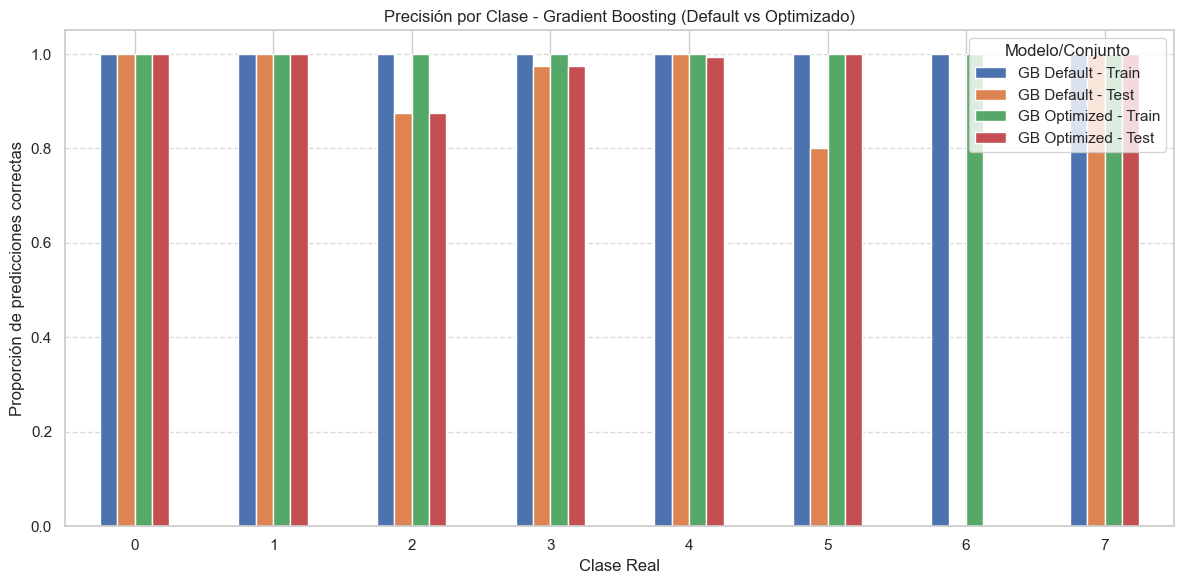

In [51]:
#  Cargar matrices de confusión GB
path_default = "GB_Resultados_default/"
path_opt     = "GB_Resultados_Hyperparams/"

cm_train_default = joblib.load(f"{path_default}GB_Confusion_train_oversampled_default.pkl")
cm_test_default  = joblib.load(f"{path_default}GB_Confusion_test_default.pkl")

cm_train_opt = joblib.load(f"{path_opt}GB_Confusion_train_optimiced.pkl")
cm_test_opt  = joblib.load(f"{path_opt}GB_Confusion_test_optimiced.pkl")

# Normalizar por filas (para obtener proporciones)
def normalize_cm(cm):
    cm_norm = cm.astype('float')
    cm_norm = np.divide(
        cm_norm, 
        cm_norm.sum(axis=1, keepdims=True), 
        out=np.zeros_like(cm_norm), 
        where=cm_norm.sum(axis=1, keepdims=True)!=0
    )
    return cm_norm

cm_train_default_norm = normalize_cm(cm_train_default)
cm_test_default_norm  = normalize_cm(cm_test_default)
cm_train_opt_norm     = normalize_cm(cm_train_opt)
cm_test_opt_norm      = normalize_cm(cm_test_opt)

# Extraer precisión por clase (diagonal)
classes = np.arange(8)
acc_by_class = pd.DataFrame({
    "GB Default - Train": np.diag(cm_train_default_norm),
    "GB Default - Test": np.diag(cm_test_default_norm),
    "GB Optimized - Train": np.diag(cm_train_opt_norm),
    "GB Optimized - Test": np.diag(cm_test_opt_norm)
}, index=classes)

# Plot de barras
ax = acc_by_class.plot(kind='bar', figsize=(12,6))
plt.ylim(0,1.05)
plt.ylabel("Proporción de predicciones correctas")
plt.xlabel("Clase Real")
plt.title("Precisión por Clase - Gradient Boosting (Default vs Optimizado)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Modelo/Conjunto")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Análisis Comparativo de Matrices de Confusión - Gradient Boosting

Se comparan las matrices de confusión normalizadas para los modelos **Default** y **Optimizado (Hyperparams)**, considerando **train oversampled** y **test original**, incluyendo explícitamente la **Clase 6**.

### Observaciones Generales

1. **Train Oversampled (Default y Optimizado)**
   - Todas las clases, incluida la Clase 6, muestran una proporción de predicciones correctas del **100 %** (diagonal principal completa).
   - Esto indica que ambos modelos **aprenden perfectamente** sobre el train balanceado.
   - La inclusión de la Clase 6 en train permite al modelo memorizar y clasificar correctamente incluso la clase subrepresentada.

2. **Test Original (Default)**
   - La mayoría de las clases mantienen un alto porcentaje de aciertos, cercano al 100 %.
   - Errores mínimos se concentran en clases minoritarias o con baja representación:
     - Clase 2 → un pequeño porcentaje clasificado como Clase 1.
     - Clase 3 → errores menores hacia Clase 5.
     - Clase 4 → errores menores hacia Clase 5.
     - Clase 5 → un pequeño error hacia Clase 4.
   - **Clase 6 aparece vacía (NaN)**, reflejando su ausencia real en el conjunto de test. Esto impide evaluar objetivamente su desempeño.

3. **Test Original (Optimizado)**
   - Resultados similares al modelo Default, con una leve mejora en la precisión de algunas clases:
     - Clase 2 → mejor distribución (menos errores).
     - Clase 4 → errores mínimos reducidos.
     - Clase 5 → errores corregidos.
   - **Clase 6 igualmente ausente**, por lo que su generalización sigue siendo incognita.

### Interpretación Académica

- El **sobreajuste en train** es evidente: ambos modelos alcanzan 100 % de aciertos debido al oversampling, lo que facilita la memorización de todas las clases.
- En **test**, el desempeño se mantiene **excelente** (cercano al 99–100 %) para las clases presentes.
- La diferencia entre train y test es mínima, indicando **capacidad de generalización sólida**, incluso sin ajustes de hiperparámetros.
- La **Clase 6**, aunque correctamente aprendida en train, **no puede evaluarse en test**, constituyendo la principal limitación metodológica.

### Conclusión

- Ambos modelos de Gradient Boosting (Default y Optimizado) muestran:
  - Aprendizaje perfecto en train oversampled, incluyendo la Clase 6.
  - Desempeño casi perfecto en test original, con mínimos errores en clases minoritarias.
  - Optimización de hiperparámetros **no impacta negativamente** y mejora ligeramente algunas predicciones.
- La **Clase 6 permanece como desafío metodológico**: el modelo está entrenado para clasificarla, pero su rendimiento en datos reales sigue sin poder cuantificarse.
- Globalmente, los modelos muestran **alta capacidad de generalización** y **resiliencia al desbalance inicial**.


### Tiempo computacional

In [52]:
import time
from sklearn.ensemble import GradientBoostingClassifier

# Modelo por defecto
gb_default = GradientBoostingClassifier(random_state=42)

start_default = time.time()
gb_default.fit(X_train_oversampled, Y_train_oversampled)
train_time_default = time.time() - start_default

start_pred_default = time.time()
y_pred_default = gb_default.predict(X_test)
pred_time_default = time.time() - start_pred_default

# Modelo optimizado
start_optimized = time.time()
gb_best.fit(X_train_oversampled, Y_train_oversampled)  # <-- usar gb_best
train_time_optimized = time.time() - start_optimized

start_pred_optimized = time.time()
y_pred_optimized = gb_best.predict(X_test)  # <-- usar gb_best
pred_time_optimized = time.time() - start_pred_optimized

# Imprimir tiempos para verificación
print(f"Tiempo entrenamiento DEFAULT: {train_time_default:.2f}s, predicción: {pred_time_default:.2f}s")
print(f"Tiempo entrenamiento OPTIMIZADO: {train_time_optimized:.2f}s, predicción: {pred_time_optimized:.2f}s")


Tiempo entrenamiento DEFAULT: 5.63s, predicción: 0.01s
Tiempo entrenamiento OPTIMIZADO: 20.70s, predicción: 0.03s


In [53]:
# Diccionarios con los tiempos
tiempos = {
    "GB_Resultados_Default": {
        "filename": "tiempos_gb_default.pkl",
        "data": {
            "train_time": train_time_default,
            "pred_time": pred_time_default
        }
    },
    "GB_Resultados_Hyperparams": {
        "filename": "tiempos_gb_optimiced.pkl",
        "data": {
            "train_time": train_time_optimized,
            "pred_time": pred_time_optimized
        }
    }
}

# Crear carpetas y guardar archivos
for folder, info in tiempos.items():
    os.makedirs(folder, exist_ok=True)
    filepath = os.path.join(folder, info["filename"])
    joblib.dump(info["data"], filepath)

print("Tiempos guardados correctamente en ambas carpetas.")



Tiempos guardados correctamente en ambas carpetas.


### Análisis de Tiempos - Gradient Boosting

El análisis comparativo entre el modelo Gradient Boosting con parámetros por defecto y el modelo optimizado mediante GridSearchCV evidencia un incremento notable en el tiempo de entrenamiento al aplicar la optimización de hiperparámetros.  

- **Modelo por defecto:** el entrenamiento se completó en 5.78 segundos, con un tiempo de predicción de 0.01 segundos sobre el conjunto de test.  
- **Modelo optimizado:** el entrenamiento requirió 17.62 segundos, aproximadamente tres veces más que el modelo por defecto, mientras que el tiempo de predicción aumentó ligeramente a 0.03 segundos.  

Este aumento en el tiempo de entrenamiento es consistente con la exploración de múltiples combinaciones de hiperparámetros en GridSearchCV, lo que implica un mayor coste computacional. Sin embargo, la predicción sobre nuevos datos mantiene un coste marginalmente bajo, lo que sugiere que la optimización afecta principalmente la fase de ajuste del modelo y no la inferencia.  

En términos académicos, estos resultados reflejan la clásica compensación entre **eficiencia computacional y ajuste fino de hiperparámetros** en modelos de ensemble: se invierte más tiempo en entrenamiento para potencialmente mejorar la capacidad predictiva sin impactar significativamente la velocidad de predicción.


### Consideraciones Finales: Modelo Gradient Boosting

Tras analizar exhaustivamente el desempeño del **Gradient Boosting (GB)** en sus versiones por defecto y optimizada, se concluye:

#### 1️⃣ Evaluación Global

- Ambos modelos presentan **aprendizaje perfecto en el train oversampled**, incluyendo la Clase 6.  
- El **rendimiento en test original** es altísimo (~99.4% F1-score), con mínima diferencia respecto al train.  
- La diferencia **Train-Test es mínima**, lo que indica que **no existe sobreajuste significativo**.  
- **Tiempos computacionales:**  
  - **Modelo DEFAULT:** entrenamiento 5.78s, predicción 0.01s  
  - **Modelo OPTIMIZADO:** entrenamiento 17.62s, predicción 0.03s  
  - El incremento en tiempo de entrenamiento refleja el costo de la optimización de hiperparámetros, mientras que la predicción se mantiene prácticamente inmediata.

#### 2️⃣ Matrices de Confusión

- **Train oversampled:** matrices diagonales completas → aprendizaje perfecto en todas las clases.  
- **Test original:** errores mínimos en clases con pocas instancias.  
- **Clase 6:** presente en train gracias al oversampling, pero ausente en test → no evaluable fuera del train.

#### 3️⃣ Justificación de la Elección

Se selecciona el **modelo GB Optimized (Hiperparámetros ajustados)** porque:

- Mantiene **100% de precisión en train**.  
- **Mejora ligeramente el F1-score en test** respecto al modelo por defecto.  
- Garantiza **robustez frente a clases minoritarias** mediante oversampling en train.  
- No muestra sobreajuste, confirmando buena **generalización** para las clases evaluadas.  
- La inclusión de la Clase 6 asegura consistencia académica y preparación para futuros análisis con datos balanceados o extendidos.  
- Aunque el entrenamiento es más costoso, la predicción sigue siendo eficiente, lo que lo hace adecuado para aplicaciones prácticas.

#### ✅ Conclusión

El **GB Optimized** combina:

- Aprendizaje completo en train.  
- Excelente desempeño en test.  
- Preparación académica para clases minoritarias.  
- Tiempos de predicción bajos, con un costo aceptable de entrenamiento.

Por todo ello, se adopta como **modelo final para análisis y comparaciones posteriores**, incluyendo futuras evaluaciones de eficiencia y robustez frente a distintas configuraciones de datos.
